<a href="https://colab.research.google.com/github/youknowds/assignment/blob/python2/Homework3_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

In [ ]:
# Nothing to do here

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
# Import modules
import pandas as pd

# Read colors data
# -- YOUR CODE HERE --
color = pd.read_csv('/content/gdrive/My Drive/colors.csv')

# Print the first few rows
# -- YOUR CODE HERE --
print(color.head())

   id            name     rgb is_trans
0  -1       [Unknown]  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

---------------------------------------------------------------------------------
- Create a variable named num_colors that counts the number of distinct colors and print it out.

-------------------------------------------------

In [14]:
# How many distinct colors are available?
# -- YOUR CODE HERE --
num_colors=len(color['name'].unique())
num_colors

186

## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

----------------------------------------------------------------------

- Summarize colors based on their transparency.

- Save the result as a variable named colors_summary.

- Print out colors_summary.

-----------------------------------------------------------------------


In [15]:
# colors_summary: Distribution of colors based on transparency
# -- YOUR CODE HERE --
colors_summary=color.groupby('is_trans')['name'].count()
display(colors_summary)

is_trans
f    151
t     35
Name: name, dtype: int64

## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

-------------------------------------------------------------------

- Read the data in datasets/sets.csv as a DataFrame named sets.

- Create a summary of the average number of parts per year and save it as parts_by_year.

- Plot the average number of parts per year.

--------------------------------------------------------------------

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471.0
1,0011-2,Town Mini-Figures,1978,84,12.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2.0
3,0012-1,Space Mini-Figures,1979,143,12.0
4,0013-1,Space Mini-Figures,1979,143,12.0
...,...,...,...,...,...
11861,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15.0
11862,WHITEHOUSE-1,Micro White House,2015,598,59.0
11863,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146.0
11864,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28.0


year
1950     10.142857
1953     16.500000
1954     12.357143
1955     36.857143
1956     18.500000
           ...    
2013    181.359191
2014    169.320280
2015    195.566210
2016    249.368595
2017    312.944444
Name: num_parts, Length: 66, dtype: float64

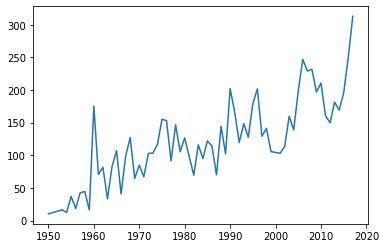

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

# Read sets data as `sets`
# -- YOUR CODE HERE --
sets = pd.read_csv('/content/gdrive/My Drive/sets.csv')
display(sets)
# Create a summary of average number of parts by year: `parts_by_year`
# -- YOUR CODE HERE --
parts_by_year=sets.dropna().groupby('year')['num_parts'].mean()
print()
display(parts_by_year)


# Plot trends in average number of parts by year
# -- YOUR CODE HERE --
plt.plot(parts_by_year)

## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

-------------------------------------
- Create a summary of the number of distinct themes shipped by year.

- Save it as a DataFrame named themes_by_year.

- Print the first couple of rows in themes_by_year.

##### Note: In this step you may need to use an aggregation function that you have yet to encounter. The documentation here may be of assistance. You will want to find a way to return the number of unique values in each group.

------------------------------------------------------------------------------

In [30]:
# themes_by_year: Number of themes shipped by year
# -- YOUR CODE HERE --
grouped=sets.dropna().groupby('year')['theme_id']
themes_by_year=grouped.agg(['nunique'])
display(themes_by_year.head(5))

,nunique
year,
1950,2
1953,1
1954,2
1955,4
1956,3


## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>

-----------------------------------------------
- In 1999, Lego expanded into licensed sets with the introduction of Star Wars themed sets. In that year, how many unique themes were released?

- Assign your answer to the variable num_themes.

- Print num_themes.


##### Note: If you have another interesting subjects with lego datasets, try it.

-------------------------------------------------------------

In [51]:
num_themes=themes_by_year[themes_by_year.index == 1999].values
display(num_themes)

array([[71]])